 # __DAMA50: Unit4 Notebook [25-1-2024]__

# 1. Derivative of a univariate function

In [15]:
%display latex
x(t)=2*t^3-3*t^2-12*t+8;x(t)

2*t^3 - 3*t^2 - 12*t + 8

In [16]:
v(t)=diff(x(t),t);v(t)

6*t^2 - 6*t - 12

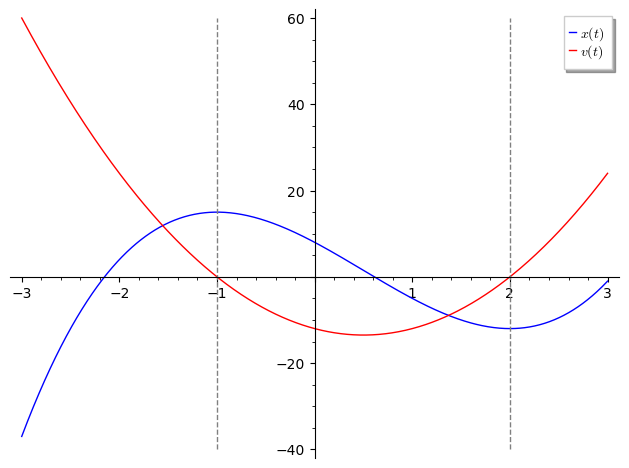

In [31]:
plot(x(t),(t,-3,3),legend_label='$x(t)$')+\
plot(v(t),(t,-3,3),color='red',legend_label='$v(t)$')+\
line([(-1,-40),(-1,60)],color='gray',linestyle='dashed')+\
line([(2,-40),(2,60)],color='gray',linestyle='dashed')

### Derivatives of univariate functions

In [41]:
x=var('x')
diff(x*sin(x),x)

x*cos(x) + sin(x)

In [42]:
diff(arctan(x),x)

1/(x^2 + 1)

In [45]:
t=var('t')
g(t)=cos(t)*exp(t)
diff(g(t),t).factor()

(cos(t) - sin(t))*e^t

In [46]:
diff(g(t),t,2).factor()

-2*e^t*sin(t)

In [48]:
d3=diff(g(t),t,3).factor();d3

-2*(cos(t) + sin(t))*e^t

In [50]:
diff(sin(x^2),x,4)

16*x^4*sin(x^2) - 48*x^2*cos(x^2) - 12*sin(x^2)

# 2. Partial derivatives of multivariate functions

In [88]:
x,y = var('x y')

In [89]:
f(x,y)=3*sin(x)-2*cos(y)-x*y

In [90]:
diff(f(x,y),x)

-y + 3*cos(x)

In [91]:
diff(f(x,y),x,x)

-3*sin(x)

In [92]:
diff(f(x,y),x,y)

-1

#### Gradient

In [93]:
f.gradient()

(x, y) |--> (-y + 3*cos(x), -x + 2*sin(y))

In [94]:
gradf=f.gradient([x,y])

In [95]:
gradf(x,y)

(-y + 3*cos(x), -x + 2*sin(y))

In [96]:
gradf(0,pi)

(-pi + 3, 0)

#### Jacobian

In [97]:
jacobian(f(x,y), (x,y))

[-y + 3*cos(x) -x + 2*sin(y)]

### Hessian matrix

In [98]:
h(x,y)=f(x,y).hessian()

In [76]:
h(x,y)

[-3*sin(x)        -1]
[       -1  2*cos(y)]

# 3. Power Series expansions

#### a) Univariate functions

In [83]:
%display latex
x=var('x')

In [84]:
((1+arctan(x))^(2)).series(x==0, 5)

1 + 2*x + 1*x^2 + (-2/3)*x^3 + (-2/3)*x^4 + Order(x^5)

In [14]:
(1/tan(x)).series(x==pi/2,5)

(-1)*(-1/2*pi + x) + (-1/3)*(-1/2*pi + x)^3 + Order(-1/32*(pi - 2*x)^5)

The last term indicates the lowest power ommited in the expansion

Sagemath can automatically perform expansions

In [75]:
%display latex
R.<x> = PowerSeriesRing(QQ,default_prec = 10)

In [76]:
sin(x)

x - 1/6*x^3 + 1/120*x^5 - 1/5040*x^7 + 1/362880*x^9 + O(x^10)

In [77]:
(1+x)(1+x^2)

2 + x^2

In [78]:
sin(x)/(1+cos(x))

1/2*x + 1/24*x^3 + 1/240*x^5 + 17/40320*x^7 + 31/725760*x^9 + O(x^10)

In [79]:
w=log(1+x);w

x - 1/2*x^2 + 1/3*x^3 - 1/4*x^4 + 1/5*x^5 - 1/6*x^6 + 1/7*x^7 - 1/8*x^8 + 1/9*x^9 + O(x^10)

We can obtain a normal expression (without the last term) using truncate

In [80]:
wt=w.truncate();wt

1/9*x^9 - 1/8*x^8 + 1/7*x^7 - 1/6*x^6 + 1/5*x^5 - 1/4*x^4 + 1/3*x^3 - 1/2*x^2 + x

In [81]:
x=var('x')

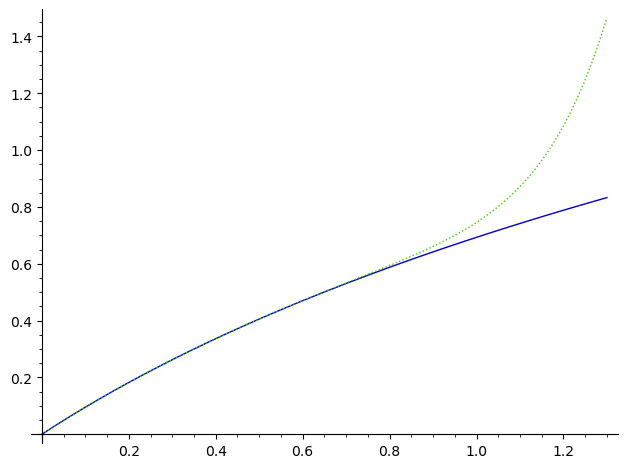

In [83]:
plot([log(1+x),wt],(x,0,1.3),linestyle=['-',':'])

#### b) Multivariate functions

In [84]:
R.<u, v> = PowerSeriesRing(QQ, default_prec = 20)

In [85]:
w1=cos(u*v^2);w1

1 - 1/2*u^2*v^4 + 1/24*u^4*v^8 - 1/720*u^6*v^12 + O(u, v)^20

In [86]:
w2=u*sin(v);w2

u*v - 1/6*u*v^3 + 1/120*u*v^5 - 1/5040*u*v^7 + 1/362880*u*v^9 - 1/39916800*u*v^11 + 1/6227020800*u*v^13 - 1/1307674368000*u*v^15 + 1/355687428096000*u*v^17 - 1/121645100408832000*u*v^19 + O(u, v)^21

In [87]:
sin(w1*w2)

u*v - 1/6*u*v^3 - 1/6*u^3*v^3 + 1/120*u*v^5 - 5/12*u^3*v^5 - 1/5040*u*v^7 + 1/120*u^5*v^5 + 47/720*u^3*v^7 + 1/362880*u*v^9 + 35/144*u^5*v^7 - 173/90720*u^3*v^9 - 1/39916800*u*v^11 - 1/5040*u^7*v^7 - 697/8640*u^5*v^9 - 311/3628800*u^3*v^11 + 1/6227020800*u*v^13 - 89/4320*u^7*v^9 + 7081/362880*u^5*v^11 + 89/9580032*u^3*v^13 - 1/1307674368000*u*v^15 + 1/362880*u^9*v^9 - 11111/86400*u^7*v^11 - 128063/43545600*u^5*v^13 - 581491/1307674368000*u^3*v^15 + 1/355687428096000*u*v^17 + 167/241920*u^9*v^11 + 706709/10886400*u^7*v^13 + 246179/958003200*u^5*v^15 + 7871/523069747200*u^3*v^17 - 1/121645100408832000*u*v^19 + O(u, v)^21

# 4. Automatic differentation

Install the autograd package if not installed already. 

In [123]:
try :
    import autograd
    print ("Autograd is already installed!")
except :
    print ("Installing autograd.")
    !pip install autograd

Autograd is already installed!


Import grad and numpy from autograd.

In [124]:
import autograd.numpy as np
from autograd import grad

 Define a python function for use with autograd using numpy definitions 
 for elementary functions, that is np.sin(x) instead of sin(x), np.exp(x) instead exp(x) etc

In [111]:
def myf(w):
    x,y = w
    return np.sqrt(x^2+y^2)+np.cos(x^2-y^2)

Autograd builds a function for computing derivatives

In [125]:
agrad_myf = grad(myf)

In [ ]:
Print the gradient of the function for the given values of (x,y)

In [126]:
agrad_myf(np.array([3.,-1.2]))

array([-4.81410966, -2.66842522])

Calculate the gradient using symbolic differentiation after defining a sagemath function

In [127]:
x, y = var('x,y')
f(x,y) = sqrt(x^2+y^2) + cos(x^2-y^2)

Print the gradient of the function for the given values of (x,y)

In [128]:
gf=f.gradient([x,y])
gf(3.,-1.2)

(-4.81410966343724, -2.66842521808310)

We compute the autograd execution time

In [140]:
%timeit agrad_myf(np.array([3.,-1.2]))

1.26 ms ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
And the analytic derivative execution time

In [141]:
%timeit gf(3.,-1.2)

1 ms ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


The execution times of the two methods  are comparable. However, in the first case <br>
(autograd) we do not need to know the derivative analytically.

# 5. Appendix A: Ploting vector fields using sagemath

Here we plot the gradient of a scalar function
$$\vec{\nabla} f(x,y)\ \,\ \text{where}\ f(x,y)=\sin(x y^2)$$

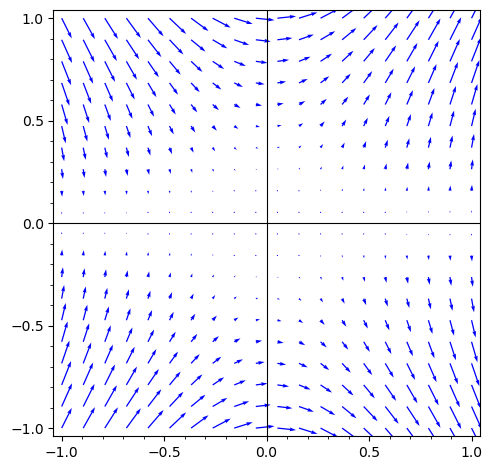

In [68]:
f(x,y)=sin(x*y^2)
plot_vector_field(f.gradient(),(x,-1,1),(y,-1,1),aspect_ratio=1,color='blue')

Here we plot the vector field
$$
\vec{f}(x,y)= \left[y, \cos(x-2) \sin(x)\right]$$

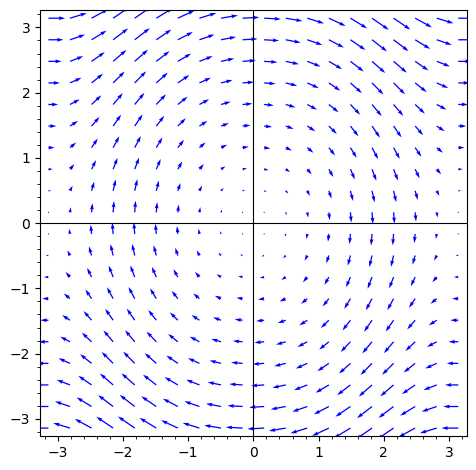

In [67]:
plot_vector_field((y,(cos(x)-2) * sin(x)), (x,-pi,pi), (y,-pi,pi),\
                  aspect_ratio=1,color='blue')

# 6. Appendix B: Representation of Piecewise functions in sagemath

$f(x)=\begin{cases}
-x  & ,\ x<-1\\
1 & ,\ -1\le x \le 1\\
+x & ,\ x >1
\end{cases}$

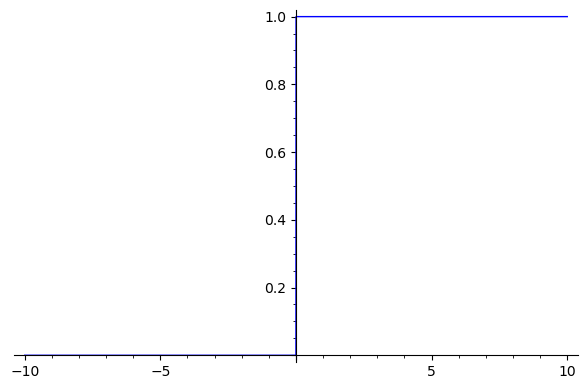

In [77]:
plot(unit_step(x),(x,-10,10))

In [78]:
f(x) = -x*unit_step(-1-x)+x*unit_step(x-1)+unit_step(1-x)*unit_step(1+x)

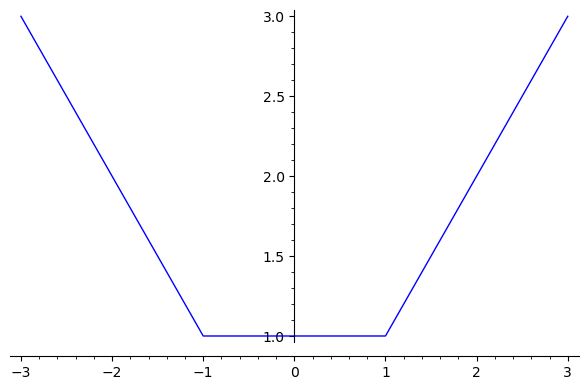

In [79]:
g=plot(f(x),(x,-3,3));g

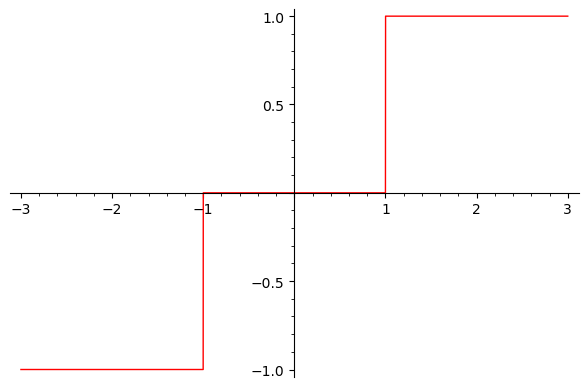

In [81]:
dg=plot(diff(f(x),x),(x,-3,3),color='red');dg

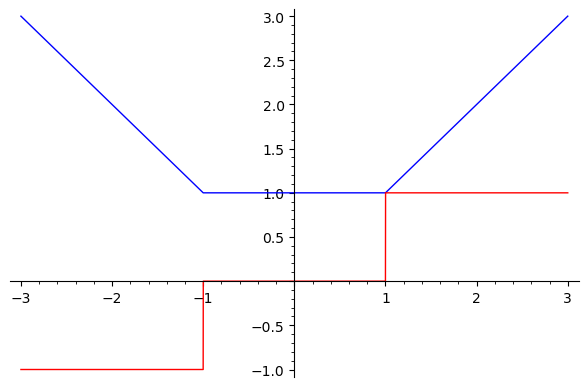

In [82]:
g+dg